
# Exponential growth

Consider that the population can be described by
$$
\frac{dN}{dt} = bN(t) - dN(t) = (b-d)N(t)
$$

where $b$ and $d$ are positive constants coresponding to the birth and death  rate

## Numerical Solution

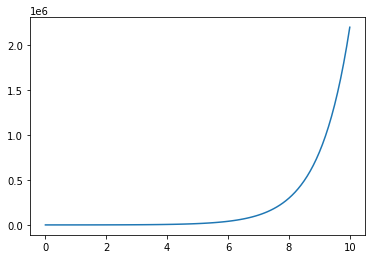

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 


def N(y,t,b,d):
       
    return (b-d)*y

#birth > death
b = 2
d =1
N0 = 100
t = np.linspace(0,10,101)

sol = odeint(N,N0,t,args = (b,d))

plt.plot(t,sol)

    

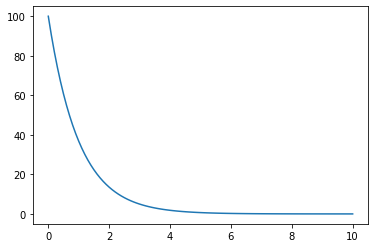

In [7]:
#death > birth
b = 1
d = 2

sol_2 = odeint(N,N0,t,args = (b,d))

plt.plot(t,sol_2)


Suppose now we are interested in a case with some factor $\gamma$ representing the imigration, then 

$$\frac{dN}{dt} = (b-d)N(t) + \gamma$$

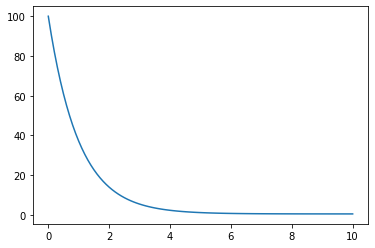

In [13]:
def N_imigration(y,t,b,d,g):
       
    return (b-d)*y + g

#birth > death
b = 1
d = 2
g = 0.5
N0 = 100
t = np.linspace(0,10,101)

sol = odeint(N_imigration,N0,t,args = (b,d,g))

plt.plot(t,sol)

## Mathematical Solution

$$\begin{split}
\frac{dN}{dt} &= (b-d)N(t) \\
\int \frac{1}{N(t)} dN &=  \int (b-d) dt \\
ln(N) + C_1  &= (b-d)t + C_2 \\
ln(N) &= (b-d)t + C\\
N &= e^{(b-d)t +C}
\end{split}$$

Now looking at $$t = 0$$

$$N(0) = e^C$$

So substituting into our solution yields

$$N(t) = e^{(b-d)t + C} = e^{(b-d)t}e^C=N(0)e^{(b-d)t}$$

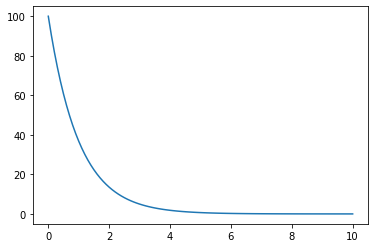

In [8]:
n = [N0*np.exp((b-d)*x) for x in t]

plt.plot(t,n)

To solve $$\frac{dN}{dt} = (b-d)N(t) + \gamma$$ note this equation can be rewritten as $$\frac{dN}{dt} + (d-b)N(t) = \gamma$$ which is a first order linear ODE of the form $$y'+a(x)y=b(x)$$ which is solved by finding an integrating factor $\mu(x)$ such that 

$$\mu(x)y'+\mu(x)a(x)y=\frac{d}{dx}(\mu(x)y)=\mu y' + \mu(x)'y $$ 

thus we set 

$$\mu(x)'=\mu(x)a(x) \quad  \Longrightarrow \quad \ln|\mu(x)| = \int a(x)dx \text{ or } \mu(x)= \exp\left( \int a(x)dx \right)$$

Notice that $$(\mu(x)y)'=\mu(x)b(x)$$ thus $$y=\frac{1}{\mu(x)}\left(\int b(x)\mu(x)dx +  C\right)$$

In this case $\mu(x) = \exp \left(\int (b-d) dt\right) = e^{(d-b)t}$ giving $$N(t) = e^{(b-d)t}\left(\int \gamma e^{(d-b)t} dt + C \right) = e^{(b-d)t} \left( \gamma \frac{e^{(d-b)t}}{d-b} + C\right)$$ for $t = 0$ $$N(0) = \frac{\gamma}{d-b} + C$$
after substitution we obtain 

$$N(t) = \frac{\gamma}{d-b}(1-e^{(b-d)t})+N(0)e^{(b-d)t}$$

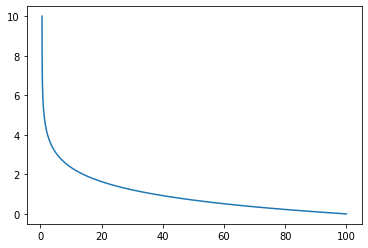

In [16]:
n_im  =  [g/(d-b) * (1-np.exp((b-d)*x))+N0*np.exp((b-d)*x) for x in t]

plt.plot(n_im,t)